In [100]:
import pandas as pd

owid = pd.read_csv('owid-covid-data.csv')
print(len(owid))
owid.head()

105933


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [101]:
today = list()
d = '2021-07-27' #latest date
num = 0
numlen = len(owid)
print(numlen)

while num < numlen :
#     print(num)
    if owid['date'][num] == d :
        today.append(True)
#         print(num,' ',True)
    else:
        today.append(False)
#         print(num,' ',False)
    num = num+1
# print('done')
check = pd.DataFrame()
check['datecheck'] = today

owid['today2'] = check['datecheck']
print('done')

105933
done


In [102]:
location = list()
total_tests = list()
total_cases = list()
population = list()
total_deaths = list()
reproduction_rate = list()
gdp_per_capita = list()
extreme_poverty = list()
hospital_beds_per_thousand = list()
positive_rate = list()

total_vaccinations = list()
people_vaccinated = list()
people_fully_vaccinated = list()
new_vaccinations = list()

In [103]:
# owid['today2'][33]
type(owid['gdp_per_capita'][33])
type(owid)

pandas.core.frame.DataFrame

In [104]:
num = 0
numlen = len(owid)
print(numlen)


while num < numlen :

    if owid['today2'][num] == True :
        location.append(owid.location[num])
        total_tests.append(owid.total_tests[num])
        total_cases.append(owid.total_cases[num])
        population.append(owid.population[num])
        total_deaths.append(owid.total_deaths[num])
        reproduction_rate.append(owid.reproduction_rate[num])
        gdp_per_capita.append(owid.gdp_per_capita[num])
        extreme_poverty.append(owid.extreme_poverty[num])
        hospital_beds_per_thousand.append(owid.hospital_beds_per_thousand[num])
        positive_rate.append(owid.positive_rate[num])
        total_vaccinations.append(owid.total_vaccinations[num])
        people_vaccinated.append(owid.people_vaccinated[num])
        people_fully_vaccinated.append(owid.people_fully_vaccinated[num])
        new_vaccinations.append(owid.new_vaccinations[num])
        
    num = num+1
    
print('done.')

105933
done.


In [105]:
data = {'location' : location, 'total_tests' : total_tests, 'positive_rate':positive_rate,
        'total_cases' : total_cases, 'population':population, 'total_deaths':total_deaths,
        'reproduction_rate':reproduction_rate,'gdp_per_capita':gdp_per_capita,'extreme_poverty':extreme_poverty,
        'hospital_beds_per_thousand':hospital_beds_per_thousand, 'total_vaccinations': total_vaccinations,
       'people_vaccinated':people_vaccinated, 'people_fully_vaccinated':people_fully_vaccinated,
       'new_vaccinations':new_vaccinations}
new_data = pd.DataFrame.from_dict(data)
print(len(new_data))

214


In [106]:
new_data.total_deaths[62]

4374.0

In [107]:
#total_deaths_rate = total_deaths/total_cases to check lethality
total_deaths_rate = list()
num = 0
numlen = len(new_data)

while num < numlen:
    prev = num
    num = num+1
    total_deaths = new_data.total_deaths[prev]
    total_cases = new_data.total_cases[prev]
    result = (total_deaths/total_cases)*100
    total_deaths_rate.append(result)
    
    print(num,' ',total_deaths,' ',total_cases,' ',result)
print('done.')
# print(total_deaths_rate)
new_data['total_death_rate'] = total_deaths_rate
new_data.head(5)

1   6515.0   145008.0   4.492855566589429
2   166111.0   6533610.0   2.542407642941651
3   2456.0   132922.0   1.8477001549781074
4   4112.0   165204.0   2.4890438488172197
5   127.0   14586.0   0.8706979295214589
6   994.0   42110.0   2.3604844454998815
7   43.0   1288.0   3.3385093167701863
8   104352.0   4875927.0   2.1401468889915702
9   4597.0   229090.0   2.006634946964075
10   nan   nan   nan
11   878370.0   60965797.0   1.4407586601385691
12   921.0   33473.0   2.751471335105906
13   10737.0   656949.0   1.6343734445139577
14   5011.0   341183.0   1.4687132711770516
15   284.0   14252.0   1.9927027785573954
16   1383.0   268731.0   0.5146410350871318
17   19779.0   1194752.0   1.6554900096421683
18   48.0   4359.0   1.1011699931176875
19   3413.0   441881.0   0.7723798941343937
20   25230.0   1119030.0   2.254631243130211
21   333.0   13983.0   2.3814632053207463
22   107.0   8324.0   1.2854396924555502
23   2.0   2500.0   0.08
24   17716.0   470024.0   3.7691692339114597
25   

,location,total_tests,positive_rate,total_cases,population,total_deaths,reproduction_rate,gdp_per_capita,extreme_poverty,hospital_beds_per_thousand,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_death_rate
0,Afghanistan,NaN,NaN,145008.0,3.892834e+07,6515.0,0.74,1803.987,NaN,0.50,1277085.0,NaN,NaN,NaN,4.492856
1,Africa,NaN,NaN,6533610.0,1.340598e+09,166111.0,NaN,NaN,NaN,NaN,63211441.0,42451985.0,21917825.0,867751.0,2.542408
2,Albania,NaN,NaN,132922.0,2.877800e+06,2456.0,1.34,11803.431,1.1,2.89,NaN,NaN,NaN,NaN,1.847700
3,Algeria,NaN,NaN,165204.0,4.385104e+07,4112.0,1.32,13913.839,0.5,1.90,NaN,NaN,NaN,NaN,2.489044
4,Andorra,202809.0,0.14,14586.0,7.726500e+04,127.0,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.870698


In [108]:
confirmed_rate = list()
num = 0
numlen = len(new_data)
print(numlen)

while num < numlen:
    population = new_data.population[num]
    total_cases = new_data.total_cases[num]
    result = (total_cases/population)*100
    confirmed_rate.append(result)
    num = num+1
print(num,'done.')

# # confirmed_rate
new_data['confirmed_rate'] = confirmed_rate
new_data.head(5)

214
214 done.


,location,total_tests,positive_rate,total_cases,population,total_deaths,reproduction_rate,gdp_per_capita,extreme_poverty,hospital_beds_per_thousand,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_death_rate,confirmed_rate
0,Afghanistan,NaN,NaN,145008.0,3.892834e+07,6515.0,0.74,1803.987,NaN,0.50,1277085.0,NaN,NaN,NaN,4.492856,0.372500
1,Africa,NaN,NaN,6533610.0,1.340598e+09,166111.0,NaN,NaN,NaN,NaN,63211441.0,42451985.0,21917825.0,867751.0,2.542408,0.487365
2,Albania,NaN,NaN,132922.0,2.877800e+06,2456.0,1.34,11803.431,1.1,2.89,NaN,NaN,NaN,NaN,1.847700,4.618876
3,Algeria,NaN,NaN,165204.0,4.385104e+07,4112.0,1.32,13913.839,0.5,1.90,NaN,NaN,NaN,NaN,2.489044,0.376739
4,Andorra,202809.0,0.14,14586.0,7.726500e+04,127.0,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.870698,18.877888


In [109]:
people_vaccinated_rate = list()
people_fully_vaccinated_rate = list()
num = 0
numlen = len(new_data)
print(numlen)

while num < numlen:
    population = new_data.population[num]
    people_vaccinated = new_data.people_vaccinated[num]
#     print(num,'',people_vaccinated)
    result1 = (people_vaccinated/population)*100
    people_vaccinated_rate.append(result1)
        
    people_fully_vaccinated = new_data.people_fully_vaccinated[num]
    result2 = (people_fully_vaccinated/population)*100
#     print(num,' ',result2)
    people_fully_vaccinated_rate.append(result2)
    num = num+1
print(num,'done.')

new_data['people_vaccinated_rate'] = people_vaccinated_rate
new_data['people_fully_vaccinated_rate'] = people_fully_vaccinated_rate
new_data.head(5)

214
214 done.


,location,total_tests,positive_rate,total_cases,population,total_deaths,reproduction_rate,gdp_per_capita,extreme_poverty,hospital_beds_per_thousand,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_death_rate,confirmed_rate,people_vaccinated_rate,people_fully_vaccinated_rate
0,Afghanistan,NaN,NaN,145008.0,3.892834e+07,6515.0,0.74,1803.987,NaN,0.50,1277085.0,NaN,NaN,NaN,4.492856,0.372500,NaN,NaN
1,Africa,NaN,NaN,6533610.0,1.340598e+09,166111.0,NaN,NaN,NaN,NaN,63211441.0,42451985.0,21917825.0,867751.0,2.542408,0.487365,3.166645,1.634929
2,Albania,NaN,NaN,132922.0,2.877800e+06,2456.0,1.34,11803.431,1.1,2.89,NaN,NaN,NaN,NaN,1.847700,4.618876,NaN,NaN
3,Algeria,NaN,NaN,165204.0,4.385104e+07,4112.0,1.32,13913.839,0.5,1.90,NaN,NaN,NaN,NaN,2.489044,0.376739,NaN,NaN
4,Andorra,202809.0,0.14,14586.0,7.726500e+04,127.0,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.870698,18.877888,NaN,NaN


In [110]:
#인구대비 확진자 수가 높은 200개국,
#그 중 치명율이 가장 높은 180개국.
#그 중 전파율이 가장 높은 160개국

confirmed_rate = new_data.sort_values(by=['confirmed_rate'], ascending=False)

c_rate = confirmed_rate.head(200)

total_deaths_rate = c_rate.sort_values(by=['confirmed_rate'], ascending=False)

t_d_r = total_deaths_rate.head(180)
t_d_r

reproduction = t_d_r.sort_values(by=['reproduction_rate'], ascending=False)

r = reproduction.head(160)
print('done')
r

done


,location,total_tests,positive_rate,total_cases,population,total_deaths,reproduction_rate,gdp_per_capita,extreme_poverty,hospital_beds_per_thousand,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_death_rate,confirmed_rate,people_vaccinated_rate,people_fully_vaccinated_rate
73,Germany,NaN,NaN,3766501.0,83783945.0,91592.0,2.00,45229.245,NaN,8.000,90370958.0,50888551.0,41843894.0,535378.0,2.431753,4.495493,60.737831,49.942616
130,Montenegro,NaN,NaN,101352.0,628062.0,1627.0,1.91,16409.288,1.0,3.861,320335.0,169919.0,150416.0,2625.0,1.605296,16.137260,27.054495,23.949228
13,Azerbaijan,3980697.0,0.039,341183.0,10139175.0,5011.0,1.81,15847.419,NaN,4.700,4632349.0,2686492.0,1945857.0,68020.0,1.468713,3.364998,26.496160,19.191473
131,Morocco,6821510.0,0.165,588448.0,36910558.0,9638.0,1.76,7485.013,1.0,1.100,22444407.0,12520195.0,9924212.0,518335.0,1.637868,1.594254,33.920362,26.887190
198,Turkey,NaN,NaN,5638178.0,84339067.0,51048.0,1.73,25129.341,0.2,2.810,69240538.0,40071797.0,24830627.0,1157548.0,0.905399,6.685132,47.512735,29.441430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,Ecuador,NaN,NaN,480720.0,17643060.0,30797.0,0.60,10581.936,3.6,1.500,10295022.0,8148966.0,2146056.0,243846.0,6.406432,2.724697,46.187940,12.163740
172,Sierra Leone,NaN,NaN,6247.0,7976985.0,119.0,0.60,1390.300,52.2,NaN,NaN,NaN,NaN,NaN,1.904914,0.078313,NaN,NaN
204,Uruguay,NaN,0.025,380793.0,3473727.0,5941.0,0.59,20551.409,0.1,2.800,4721179.0,2551556.0,2169623.0,26255.0,1.560165,10.962088,73.452980,62.458075
151,Papua New Guinea,NaN,NaN,17655.0,8947027.0,192.0,0.55,3823.194,NaN,NaN,NaN,NaN,NaN,NaN,1.087511,0.197328,NaN,NaN


In [111]:
#그 중 GDP가 낮은 130개국
gdp = r.sort_values(by=['gdp_per_capita'], ascending=True)

gdp = gdp.head(130)

# 그 중 people_fully_vaccinated_rate 낮은 100개국으로 축소
total_vaccinations_rate = gdp.sort_values(by=['people_fully_vaccinated_rate'], ascending=False)
total_vaccinations_rate = total_vaccinations_rate.tail(100)
# total_vaccinations_rate.tail(60)
# total_vaccinations_rate.head(60)

# 그 중 people_vaccinated_rate 너무 낮은 20개 국 제외. => 백신 접종 인프라가 갖춰지지 않았을 확률이 높아 
# 백신 전달이 이루어져도 백신 접종이 제대로 이루어지지 못할 가능성이 높기 때문.
vaccinated_rate = total_vaccinations_rate.sort_values(by=['people_vaccinated_rate'], ascending=True)
vaccinated_rate = vaccinated_rate.tail(80)
vaccinated_rate.head(60)

# people_vaccinated_rate 가 NaN 인 경우, 백신 접종 현황에 대한 파악 어렵기 때문에 제외하기로.
test= vaccinated_rate
# test['people_vaccinated_rate'].dropna(inplace=True)

test.isnull().sum()
# a = test['people_vaccinated_rate'].dropna(inplace=True)
# a
# test = test.dropna()
# len(test)
# test
# Extreme poverty level

location                         0
total_tests                     49
positive_rate                   42
total_cases                      0
population                       0
total_deaths                     0
reproduction_rate                0
gdp_per_capita                   0
extreme_poverty                 25
hospital_beds_per_thousand      11
total_vaccinations              56
people_vaccinated               57
people_fully_vaccinated         57
new_vaccinations                62
total_death_rate                 0
confirmed_rate                   0
people_vaccinated_rate          57
people_fully_vaccinated_rate    57
dtype: int64

In [112]:
tt = test.total_tests
tt = tt.fillna(0)
# tt
test.total_tests = tt
# test
pr = test.positive_rate                   
pr = pr.fillna(0)
test.positive_rate = pr
# test
ep = test.extreme_poverty
ep = ep.fillna(0)
test.extreme_poverty = ep
# test.isnull().sum()
hb = test.hospital_beds_per_thousand
hb = hb.fillna(0)
test.hospital_beds_per_thousand = hb
# test.isnull().sum()
nv = test.new_vaccinations
nv = nv.fillna(0)
test.new_vaccinations = nv
print(len(test))
test.isnull().sum()

80


location                         0
total_tests                      0
positive_rate                    0
total_cases                      0
population                       0
total_deaths                     0
reproduction_rate                0
gdp_per_capita                   0
extreme_poverty                  0
hospital_beds_per_thousand       0
total_vaccinations              56
people_vaccinated               57
people_fully_vaccinated         57
new_vaccinations                 0
total_death_rate                 0
confirmed_rate                   0
people_vaccinated_rate          57
people_fully_vaccinated_rate    57
dtype: int64

In [113]:
test = test.dropna()
print(len(test))
test

23


,location,total_tests,positive_rate,total_cases,population,total_deaths,reproduction_rate,gdp_per_capita,extreme_poverty,hospital_beds_per_thousand,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_death_rate,confirmed_rate,people_vaccinated_rate,people_fully_vaccinated_rate
103,Kosovo,0.0,0.010,108073.0,1.932774e+06,2269.0,1.07,9795.834,0.6,0.000,3.741900e+05,2.568080e+05,1.173820e+05,16210.0,2.099507,5.591600,13.287016,6.073240
28,Bulgaria,3542791.0,0.008,424079.0,6.948445e+06,18203.0,1.47,18563.307,1.5,7.454,1.988805e+06,1.011640e+06,9.771650e+05,0.0,4.292361,6.103222,14.559229,14.063075
108,Lebanon,0.0,0.000,557145.0,6.825442e+06,7895.0,1.53,13367.565,0.0,2.900,1.873116e+06,1.092004e+06,7.811120e+05,34965.0,1.417046,8.162768,15.999022,11.444123
89,Indonesia,0.0,0.260,3239936.0,2.735236e+08,86835.0,1.04,11188.744,5.7,1.040,6.394489e+07,4.527855e+07,1.866634e+07,1086694.0,2.680146,1.184518,16.553798,6.824399
163,Saint Lucia,0.0,0.000,5529.0,1.836290e+05,88.0,0.95,12951.839,0.0,1.300,5.603600e+04,3.202700e+04,2.400900e+04,0.0,1.591608,3.010962,17.441145,13.074732
193,Timor,153773.0,0.042,10387.0,1.318442e+06,26.0,1.20,6570.102,30.3,5.900,3.632690e+05,2.765100e+05,8.675900e+04,0.0,0.250313,0.787824,20.972481,6.580418
153,Peru,0.0,0.000,2106371.0,3.297185e+07,196058.0,0.89,12236.706,3.5,1.600,1.252178e+07,7.819321e+06,4.702462e+06,149367.0,9.307857,6.388393,23.715145,14.262053
144,North Macedonia,944136.0,0.014,156124.0,2.083380e+06,5491.0,1.51,13111.214,5.0,4.280,8.624260e+05,5.009950e+05,3.614310e+05,15090.0,3.517076,7.493784,24.047221,17.348299
160,Russia,0.0,0.048,6094379.0,1.459345e+08,152836.0,0.98,24765.954,0.1,8.050,5.862794e+07,3.527744e+07,2.335050e+07,897489.0,2.507819,4.176107,24.173481,16.000677
23,Bolivia,2060368.0,0.134,470024.0,1.167303e+07,17716.0,0.87,6885.829,7.1,1.100,4.260287e+06,2.834736e+06,1.425551e+06,0.0,3.769169,4.026581,24.284494,12.212349


In [114]:
vaccinated_rate = test.sort_values(by=['people_fully_vaccinated'], ascending=False)

In [115]:
# people_fully_vaccinated 높은 5국 추가 제외.
vaccinated_rate.tail(18)
len(vaccinated_rate)

23

In [116]:
vaccinated_rate.to_csv('30Jul.csv')

In [117]:
import pandas as pd
data = pd.read_csv('30Jul.csv')
data

,Unnamed: 0,location,total_tests,positive_rate,total_cases,population,total_deaths,reproduction_rate,gdp_per_capita,extreme_poverty,hospital_beds_per_thousand,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_death_rate,confirmed_rate,people_vaccinated_rate,people_fully_vaccinated_rate
0,210,World,0.0,0.000,195334304.0,7.794799e+09,4177716.0,1.10,15469.207,10.0,2.705,3.980089e+09,2.157285e+09,1.099555e+09,39202375.0,2.138752,2.505957,27.675955,14.106269
1,88,India,459164121.0,0.023,31484605.0,1.380004e+09,422022.0,1.01,6426.674,21.2,0.530,4.461567e+08,3.493241e+08,9.683260e+07,4244264.0,1.340407,2.281486,25.313257,7.016833
2,26,Brazil,0.0,0.000,19749073.0,2.125594e+08,551835.0,0.98,14103.452,3.4,2.200,1.365097e+08,1.015343e+08,3.888073e+07,1970074.0,2.794232,9.291084,47.767484,18.291701
3,160,Russia,0.0,0.048,6094379.0,1.459345e+08,152836.0,0.98,24765.954,0.1,8.050,5.862794e+07,3.527744e+07,2.335050e+07,897489.0,2.507819,4.176107,24.173481,16.000677
4,89,Indonesia,0.0,0.260,3239936.0,2.735236e+08,86835.0,1.04,11188.744,5.7,1.040,6.394489e+07,4.527855e+07,1.866634e+07,1086694.0,2.680146,1.184518,16.553798,6.824399
5,180,South Korea,11219195.0,0.053,193427.0,5.126918e+07,2083.0,1.29,35938.374,0.2,12.270,2.375724e+07,1.790478e+07,6.982220e+06,429875.0,1.076892,0.377277,34.923086,13.618746
6,7,Argentina,0.0,0.000,4875927.0,4.519578e+07,104352.0,0.94,18933.907,0.6,5.000,3.023038e+07,2.409644e+07,6.133940e+06,350138.0,2.140147,10.788457,53.315700,13.571932
7,118,Malaysia,17543948.0,0.113,1044071.0,3.236600e+07,8408.0,1.26,26808.164,0.1,1.900,1.839335e+07,1.248744e+07,5.905906e+06,553871.0,0.805309,3.225827,38.581974,18.247254
8,153,Peru,0.0,0.000,2106371.0,3.297185e+07,196058.0,0.89,12236.706,3.5,1.600,1.252178e+07,7.819321e+06,4.702462e+06,149367.0,9.307857,6.388393,23.715145,14.262053
9,100,Kazakhstan,0.0,0.000,609646.0,1.877671e+07,5619.0,1.24,24055.588,0.1,6.700,8.545226e+06,5.188266e+06,3.356960e+06,135466.0,0.921682,3.246821,27.631395,17.878321


In [2]:
!pip install googlemaps

In [3]:
import googlemaps
from datetime import datetime

gmaps = googlemaps.Client(key='API_KEY_HERE')

In [4]:
loc = data['location']
loc[0]

'World'

In [5]:
#geocoding an address
num = 0
numlen = len(data['location'])

Latitude = list()
Longtitude = list()

while num < numlen :
    try:
        loc = data['location'][num]
        print('loc',loc)
        geocode_result = gmaps.geocode(loc)
        # print(geocode_result)
        latitude  = geocode_result[0]["geometry"]["location"]["lat"] # 리스트에서 위도 추출
        print('latitude',latitude)
        Latitude.append(latitude)
        longitude = geocode_result[0]["geometry"]["location"]["lng"] # 리스트에서 경도 추출
        print('longitude',longitude)
        Longtitude.append(longitude)
    except:
        print(num,'exception')
        Latitude.append('')
        Longtitude.append('')
    num = num+1

print(latitude)
print(longitude)

loc World
latitude 35.2712756
longitude -81.1834641
loc India
latitude 20.593684
longitude 78.96288
loc Brazil
latitude -14.235004
longitude -51.92528
loc Russia
latitude 61.52401
longitude 105.318756
loc Indonesia
latitude -0.789275
longitude 113.921327
loc South Korea
latitude 35.907757
longitude 127.766922
loc Argentina
latitude -38.416097
longitude -63.61667199999999
loc Malaysia
latitude 4.210484
longitude 101.975766
loc Peru
latitude -9.189967
longitude -75.015152
loc Kazakhstan
latitude 48.019573
longitude 66.923684
loc Ecuador
latitude -1.831239
longitude -78.18340599999999
loc Sri Lanka
latitude 7.873053999999999
longitude 80.77179699999999
loc Bolivia
latitude -16.290154
longitude -63.58865299999999
loc Bulgaria
latitude 42.733883
longitude 25.48583
loc Lebanon
latitude 33.854721
longitude 35.862285
loc North Macedonia
latitude 41.608635
longitude 21.745275
loc Trinidad and Tobago
latitude 10.691803
longitude -61.222503
loc Kosovo
latitude 42.6026359
longitude 20.902977
loc F

In [7]:
data['longtitude'] = Longtitude
data['latitude'] = Latitude
data

,Unnamed: 0,location,total_tests,positive_rate,total_cases,population,total_deaths,reproduction_rate,gdp_per_capita,extreme_poverty,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_death_rate,confirmed_rate,people_vaccinated_rate,people_fully_vaccinated_rate,longtitude,latitude
0,210,World,0.0,0.000,195334304.0,7.794799e+09,4177716.0,1.10,15469.207,10.0,...,3.980089e+09,2.157285e+09,1.099555e+09,39202375.0,2.138752,2.505957,27.675955,14.106269,-81.183464,35.271276
1,88,India,459164121.0,0.023,31484605.0,1.380004e+09,422022.0,1.01,6426.674,21.2,...,4.461567e+08,3.493241e+08,9.683260e+07,4244264.0,1.340407,2.281486,25.313257,7.016833,78.962880,20.593684
2,26,Brazil,0.0,0.000,19749073.0,2.125594e+08,551835.0,0.98,14103.452,3.4,...,1.365097e+08,1.015343e+08,3.888073e+07,1970074.0,2.794232,9.291084,47.767484,18.291701,-51.925280,-14.235004
3,160,Russia,0.0,0.048,6094379.0,1.459345e+08,152836.0,0.98,24765.954,0.1,...,5.862794e+07,3.527744e+07,2.335050e+07,897489.0,2.507819,4.176107,24.173481,16.000677,105.318756,61.524010
4,89,Indonesia,0.0,0.260,3239936.0,2.735236e+08,86835.0,1.04,11188.744,5.7,...,6.394489e+07,4.527855e+07,1.866634e+07,1086694.0,2.680146,1.184518,16.553798,6.824399,113.921327,-0.789275
5,180,South Korea,11219195.0,0.053,193427.0,5.126918e+07,2083.0,1.29,35938.374,0.2,...,2.375724e+07,1.790478e+07,6.982220e+06,429875.0,1.076892,0.377277,34.923086,13.618746,127.766922,35.907757
6,7,Argentina,0.0,0.000,4875927.0,4.519578e+07,104352.0,0.94,18933.907,0.6,...,3.023038e+07,2.409644e+07,6.133940e+06,350138.0,2.140147,10.788457,53.315700,13.571932,-63.616672,-38.416097
7,118,Malaysia,17543948.0,0.113,1044071.0,3.236600e+07,8408.0,1.26,26808.164,0.1,...,1.839335e+07,1.248744e+07,5.905906e+06,553871.0,0.805309,3.225827,38.581974,18.247254,101.975766,4.210484
8,153,Peru,0.0,0.000,2106371.0,3.297185e+07,196058.0,0.89,12236.706,3.5,...,1.252178e+07,7.819321e+06,4.702462e+06,149367.0,9.307857,6.388393,23.715145,14.262053,-75.015152,-9.189967
9,100,Kazakhstan,0.0,0.000,609646.0,1.877671e+07,5619.0,1.24,24055.588,0.1,...,8.545226e+06,5.188266e+06,3.356960e+06,135466.0,0.921682,3.246821,27.631395,17.878321,66.923684,48.019573


In [8]:
!pip install folium

In [9]:
import folium
gmap = folium.Map()
num = 1
numlen = len(data['longtitude'])

while num < numlen :
    long = data['longtitude'][num]
    lat = data['latitude'][num]
#     locnum = 
    folium.Marker([lat,long], tooltip = data.location[num]).add_to(gmap)
    print(num)
    num = num+1
gmap

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


In [10]:
#백신 접종 인프라가 풍부하며 주변 국가들과의 거리가 인접하여 백신 허브가 될 수 있는 나라 2~3군데 모색

# gdp 높은 15 나라

gdp = data.sort_values(by=['gdp_per_capita'], ascending=False)

gdp = gdp.sort_values(by=['gdp_per_capita'], ascending=False)
gdp = gdp.head(15)
# gdp

# 그 중에 extreme poverty rate 이 0인 (전에 0으로 치환한 적 있었음) 나라와 world 키워드 제외하면서 ep 4 미만인 나라 9개국 추리기.
ep = gdp.sort_values(by=['extreme_poverty'], ascending=True)
ep = ep.tail(11)
ep
ep = ep.head(9)
ep

ep.to_csv('ep.csv')

In [132]:
import folium
import pandas as pd

ep = pd.read_csv('ep.csv')

gmap = folium.Map()
num = 0
numlen = len(ep['longtitude'])

while num < numlen :
    long = ep['longtitude'][num]
    lat = ep['latitude'][num]
#     locnum = 
    folium.Marker([lat,long], tooltip = ep.location[num]).add_to(gmap)
    print(num)
    num = num+1
gmap

0
1
2
3
4
5
6
7
8


In [133]:
loc = ep.location == 'Peru'
loc

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
Name: location, dtype: bool

In [134]:
ep['location'][0]

'Malaysia'

In [135]:
ep.iloc[4]

Unnamed: 0                                6
Unnamed: 0.1                              7
location                          Argentina
total_tests                               0
positive_rate                             0
total_cases                     4.87593e+06
population                      4.51958e+07
total_deaths                         104352
reproduction_rate                      0.94
gdp_per_capita                      18933.9
extreme_poverty                         0.6
hospital_beds_per_thousand                5
total_vaccinations              3.02304e+07
people_vaccinated               2.40964e+07
people_fully_vaccinated         6.13394e+06
new_vaccinations                     350138
total_death_rate                    2.14015
confirmed_rate                      10.7885
people_vaccinated_rate              53.3157
people_fully_vaccinated_rate        13.5719
longtitude                         -63.6167
latitude                           -38.4161
Name: 4, dtype: object

In [136]:
#South america 그룹과 asia-europe 으로 나누기
num = 0
numlen = len(ep)

Continent = list()

while num < numlen :
    loc1 = ep.location[4]
    loc2 = ep.location[7]
    loc3 = ep.location[8]
    loc = ep['location']
    print(num)
    
    if loc[num] == loc1 :
        Continent.append('south_america') 
        print(num,loc[num],'south_america')
    elif loc[num] == loc2 :
        Continent.append('south_america') 
        print(num,loc[num],'south_america')
    elif loc[num] == loc3 :
        Continent.append('south_america') 
        print(num,loc[num],'south_america')
    else :
        Continent.append('asia_europe') 
        print(num,loc[num],'asia_europe')
    num = num+1
print('done')
ep['continent'] = Continent

0
0 Malaysia asia_europe
1
1 Russia asia_europe
2
2 Kazakhstan asia_europe
3
3 South Korea asia_europe
4
4 Argentina south_america
5
5 Sri Lanka asia_europe
6
6 Bulgaria asia_europe
7
7 Brazil south_america
8
8 Peru south_america
done


In [137]:
sa = ep[ep.continent == 'south_america']
sa

,Unnamed: 0,Unnamed: 0.1,location,total_tests,positive_rate,total_cases,population,total_deaths,reproduction_rate,gdp_per_capita,...,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_death_rate,confirmed_rate,people_vaccinated_rate,people_fully_vaccinated_rate,longtitude,latitude,continent
4,6,7,Argentina,0.0,0.0,4875927.0,45195777.0,104352.0,0.94,18933.907,...,24096445.0,6133940.0,350138.0,2.140147,10.788457,53.315700,13.571932,-63.616672,-38.416097,south_america
7,2,26,Brazil,0.0,0.0,19749073.0,212559409.0,551835.0,0.98,14103.452,...,101534282.0,38880731.0,1970074.0,2.794232,9.291084,47.767484,18.291701,-51.925280,-14.235004,south_america
8,8,153,Peru,0.0,0.0,2106371.0,32971846.0,196058.0,0.89,12236.706,...,7819321.0,4702462.0,149367.0,9.307857,6.388393,23.715145,14.262053,-75.015152,-9.189967,south_america


In [138]:
sa = ep.sort_values(by=['people_fully_vaccinated_rate'], ascending=False)
sa

# 아르헨티나의 1차 접종 비율은 53%에 병상 수 1위로 비교적 안정적인 백신 접종 및 코로나 감염 관리 추이.
#브라질의 경우 인구가 다른 두 나라의 10배 가까이 되므로 백신 접종 및 인프라 구축 노하우가 아르헨티나 보다 더 풍부할 가능성이 있음.
#페루의 경우 total death rate 이 9.3% 가장 높고 백신 도입이 가장 시급해 보이나,
#몇가지 뉴스 기사에 의하면 페루 전 대통령인 시스코 사가스티의 부패 의혹에 따라 7월 29일에 새 대통령인 카스티요가 취임,
#정국 혼란 수습과 분열된 민심 통합 등의 과제를 맡게 되었으므로 당장 백신 허브로서의 역할 하기에는 한계 있을것으로 추정.
#그러므로 남아메리카에서 백신 허브로서 가장 적합해 보이는 나라는 브라질.

,Unnamed: 0,Unnamed: 0.1,location,total_tests,positive_rate,total_cases,population,total_deaths,reproduction_rate,gdp_per_capita,...,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_death_rate,confirmed_rate,people_vaccinated_rate,people_fully_vaccinated_rate,longtitude,latitude,continent
7,2,26,Brazil,0.0,0.000,19749073.0,212559409.0,551835.0,0.98,14103.452,...,101534282.0,38880731.0,1970074.0,2.794232,9.291084,47.767484,18.291701,-51.925280,-14.235004,south_america
0,7,118,Malaysia,17543948.0,0.113,1044071.0,32365998.0,8408.0,1.26,26808.164,...,12487441.0,5905906.0,553871.0,0.805309,3.225827,38.581974,18.247254,101.975766,4.210484,asia_europe
2,9,100,Kazakhstan,0.0,0.000,609646.0,18776707.0,5619.0,1.24,24055.588,...,5188266.0,3356960.0,135466.0,0.921682,3.246821,27.631395,17.878321,66.923684,48.019573,asia_europe
1,3,160,Russia,0.0,0.048,6094379.0,145934460.0,152836.0,0.98,24765.954,...,35277439.0,23350502.0,897489.0,2.507819,4.176107,24.173481,16.000677,105.318756,61.524010,asia_europe
8,8,153,Peru,0.0,0.000,2106371.0,32971846.0,196058.0,0.89,12236.706,...,7819321.0,4702462.0,149367.0,9.307857,6.388393,23.715145,14.262053,-75.015152,-9.189967,south_america
6,13,28,Bulgaria,3542791.0,0.008,424079.0,6948445.0,18203.0,1.47,18563.307,...,1011640.0,977165.0,0.0,4.292361,6.103222,14.559229,14.063075,25.485830,42.733883,asia_europe
3,5,180,South Korea,11219195.0,0.053,193427.0,51269183.0,2083.0,1.29,35938.374,...,17904781.0,6982220.0,429875.0,1.076892,0.377277,34.923086,13.618746,127.766922,35.907757,asia_europe
4,6,7,Argentina,0.0,0.000,4875927.0,45195777.0,104352.0,0.94,18933.907,...,24096445.0,6133940.0,350138.0,2.140147,10.788457,53.315700,13.571932,-63.616672,-38.416097,south_america
5,11,183,Sri Lanka,4392905.0,0.145,299892.0,21413250.0,4195.0,1.08,11669.077,...,7839638.0,1882693.0,481422.0,1.398837,1.400497,36.611154,8.792187,80.771797,7.873054,asia_europe


In [139]:
ae = ep[ep.continent == 'asia_europe']
ae

,Unnamed: 0,Unnamed: 0.1,location,total_tests,positive_rate,total_cases,population,total_deaths,reproduction_rate,gdp_per_capita,...,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_death_rate,confirmed_rate,people_vaccinated_rate,people_fully_vaccinated_rate,longtitude,latitude,continent
0,7,118,Malaysia,17543948.0,0.113,1044071.0,32365998.0,8408.0,1.26,26808.164,...,12487441.0,5905906.0,553871.0,0.805309,3.225827,38.581974,18.247254,101.975766,4.210484,asia_europe
1,3,160,Russia,0.0,0.048,6094379.0,145934460.0,152836.0,0.98,24765.954,...,35277439.0,23350502.0,897489.0,2.507819,4.176107,24.173481,16.000677,105.318756,61.524010,asia_europe
2,9,100,Kazakhstan,0.0,0.000,609646.0,18776707.0,5619.0,1.24,24055.588,...,5188266.0,3356960.0,135466.0,0.921682,3.246821,27.631395,17.878321,66.923684,48.019573,asia_europe
3,5,180,South Korea,11219195.0,0.053,193427.0,51269183.0,2083.0,1.29,35938.374,...,17904781.0,6982220.0,429875.0,1.076892,0.377277,34.923086,13.618746,127.766922,35.907757,asia_europe
5,11,183,Sri Lanka,4392905.0,0.145,299892.0,21413250.0,4195.0,1.08,11669.077,...,7839638.0,1882693.0,481422.0,1.398837,1.400497,36.611154,8.792187,80.771797,7.873054,asia_europe
6,13,28,Bulgaria,3542791.0,0.008,424079.0,6948445.0,18203.0,1.47,18563.307,...,1011640.0,977165.0,0.0,4.292361,6.103222,14.559229,14.063075,25.485830,42.733883,asia_europe


In [140]:
ae = ae.sort_values(by=['gdp_per_capita'], ascending=False)

# 러시아는 스푸트니크V (백신) 개발국이므로 제외하도록 하겠음. GDP 탑 3국은 한국, 말레이시아, 카자흐스탄임.

ae = ae.sort_values(by=['people_vaccinated_rate'], ascending=False)
# ae
# 백신 접종에 속도를 내고 있는 국가는 말레이시아, 스리랑카, 한국임.
# 다만 스리랑카는 외부의 백신 지원에 대한 디펜던시가 매우 크고, 중국의 코로나19 백신을 주로 이용하는 듯 함.

ae = ae.sort_values(by=['total_death_rate'], ascending=True)
# Total death rate 이 낮다는 것 = 코로나 감염 환자 관리 및 병상 수가 비교적 넉넉하다는 것.
# 말레이시아, 카자흐스탄, 한국의 순서로 Total death rate이 낮음.
# 이 중에 카자흐스탄은 카즈벡 (백신) 개발국이므로 제외하도록 하겠음.
# 말레이시아와 한국이 최적의 백신 허브로서의 컨디션을 갖추었으므로
# 한국과 말레이시아가 우선으로 백신 지원과 더불어 기술력을 전달받은 후에 인접한 국가들에 백신을 보급하면 좋을 것으로 보인다.

In [141]:
# 나라당 콜드체인 capacity 혹은 해당 국가가 백신을 핸들링 할 여력이 되는지. (규모를 미국, 영국과 비교하기.)
# US = 1799억 # https://www.edaily.co.kr/news/read?newsId=01443206628922640&mediaCodeNo=257 Jan29
# B = 45.5억 # http://www.dgpost.kr/2021/07/07/%EC%98%81%EA%B5%AD-%EC%BD%9C%EB%93%9C-%EC%B2%B4%EC%9D%B8-%EB%AC%BC%EB%A5%98-%EC%8B%9C%EC%9E%A5-%ED%86%B5%EC%B0%B0%EB%A0%A5-%EB%B0%8F-%EC%8B%AC%EC%B8%B5-%EB%B6%84%EC%84%9D-2026-%EB%85%84%EA%B9%8C/ 2018년

# 각 국의 콜드체인 규모로 산정하면 좋겠으나 사용 가능한 데이터가 없으므로
# hospital_beds_per_thousand 를 의료 인프라 유추 위해 사용 하기로.
# 국가 A의 보유 의료 기술 점수 = (hospital_beds_per_thousand / all_hospital_beds_per_thousand)
# 국가 A에 보급할 백신량 = 보유 의료 기술 점수 * pion이 보유한 전체 백신량 

In [142]:
ep

,Unnamed: 0,Unnamed: 0.1,location,total_tests,positive_rate,total_cases,population,total_deaths,reproduction_rate,gdp_per_capita,...,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_death_rate,confirmed_rate,people_vaccinated_rate,people_fully_vaccinated_rate,longtitude,latitude,continent
0,7,118,Malaysia,17543948.0,0.113,1044071.0,32365998.0,8408.0,1.26,26808.164,...,12487441.0,5905906.0,553871.0,0.805309,3.225827,38.581974,18.247254,101.975766,4.210484,asia_europe
1,3,160,Russia,0.0,0.048,6094379.0,145934460.0,152836.0,0.98,24765.954,...,35277439.0,23350502.0,897489.0,2.507819,4.176107,24.173481,16.000677,105.318756,61.524010,asia_europe
2,9,100,Kazakhstan,0.0,0.000,609646.0,18776707.0,5619.0,1.24,24055.588,...,5188266.0,3356960.0,135466.0,0.921682,3.246821,27.631395,17.878321,66.923684,48.019573,asia_europe
3,5,180,South Korea,11219195.0,0.053,193427.0,51269183.0,2083.0,1.29,35938.374,...,17904781.0,6982220.0,429875.0,1.076892,0.377277,34.923086,13.618746,127.766922,35.907757,asia_europe
4,6,7,Argentina,0.0,0.000,4875927.0,45195777.0,104352.0,0.94,18933.907,...,24096445.0,6133940.0,350138.0,2.140147,10.788457,53.315700,13.571932,-63.616672,-38.416097,south_america
5,11,183,Sri Lanka,4392905.0,0.145,299892.0,21413250.0,4195.0,1.08,11669.077,...,7839638.0,1882693.0,481422.0,1.398837,1.400497,36.611154,8.792187,80.771797,7.873054,asia_europe
6,13,28,Bulgaria,3542791.0,0.008,424079.0,6948445.0,18203.0,1.47,18563.307,...,1011640.0,977165.0,0.0,4.292361,6.103222,14.559229,14.063075,25.485830,42.733883,asia_europe
7,2,26,Brazil,0.0,0.000,19749073.0,212559409.0,551835.0,0.98,14103.452,...,101534282.0,38880731.0,1970074.0,2.794232,9.291084,47.767484,18.291701,-51.925280,-14.235004,south_america
8,8,153,Peru,0.0,0.000,2106371.0,32971846.0,196058.0,0.89,12236.706,...,7819321.0,4702462.0,149367.0,9.307857,6.388393,23.715145,14.262053,-75.015152,-9.189967,south_america


In [143]:
korea_beds = ep.hospital_beds_per_thousand[3]
# korea_beds
malay_beds = ep.hospital_beds_per_thousand[0]
# malay_beds
brazil_beds = ep.hospital_beds_per_thousand[7]
# brazil_beds
all_beds = korea_beds + malay_beds + brazil_beds

all_beds

16.37

In [153]:
num = 0
numlen = len(ep)
Countries = list()
Vaccine_doses = list()
var_list = [0, 3, 7]

for num in var_list :
    country = ep.location[num]
    Countries.append(country)
    beds = ep.hospital_beds_per_thousand[num]
    tech_score = beds / all_beds
    vaccine_doses = tech_score * 1000000
    Vaccine_doses.append(round(vaccine_doses))
    num = num+1
print('done')
final_countries = pd.DataFrame()
final_countries['country'] = Countries
final_countries['vaccine_doses'] = Vaccine_doses
final_countries

done


,country,vaccine_doses
0,Malaysia,116066
1,South Korea,749542
2,Brazil,134392


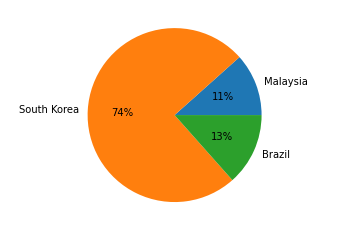

In [145]:
from matplotlib import pyplot as plt

categories = final_countries['country']
plt.axis('equal')
# plt.legend(categories)
plt.pie(final_countries['vaccine_doses'], labels=categories, autopct='%d%%')

plt.show()

In [146]:
# 분배된 백신량이 너무 과도한 양인가?
# 각 국이 현재 보유하고 있는 백신 량과 비교

import math

sk_given = 25500000
bz_given = 142000000
ml_given = 20500000

sk_pion = final_countries.vaccine_doses[1]
bz_pion = final_countries.vaccine_doses[2]
ml_pion =final_countries.vaccine_doses[0]

sk_diff = sk_pion/sk_given
bz_diff = bz_pion/bz_given
ml_diff = ml_pion/ml_given

In [147]:
print('sk_diff',sk_diff)
print('bz_diff',bz_diff)
print('ml_diff',ml_diff)

sk_diff 0.029393764705882352
bz_diff 0.0009464225352112676
ml_diff 0.005661707317073171


In [148]:
# 분배된 백신으로 국민 몇 % 가 사용 가능한가?
sk_pop = sk_pion/ep.population[3]
bz_pop = bz_pion/ep.population[7]
ml_pop = ml_pion/ep.population[0]

print('sk_pop',sk_pop)
print('bz_pop',bz_pop)
print('ml_pop',ml_pop)

sk_pop 0.014619718047779307
bz_pop 0.0006322561802004257
ml_pop 0.0035860164114204047


In [149]:
# 하루 접종량과 비교
sk_vc_aday = data.new_vaccinations[5]
ml_vc_aday = data.new_vaccinations[7]
bz_vc_aday = data.new_vaccinations[2]

In [150]:
print(int(sk_vc_aday/116065),'days')
print(int(bz_vc_aday/1970074),'days')
print(int(ml_vc_aday/553871),'days')

3 days
1 days
1 days


In [ ]:
Conclusion :

백신 허브로서 가장 적합한 세가지 국가는 브라질과 말레이시아, 한국.
의료 인프라 (1000명당 침상 수) 를 기준으로 백신 분배한 결과
한국이 749541, 브라질이 134392, 말레이시아가 116065 doses 를 Pion 으로 부터 공급받을 수 있게 된다.
분배된 백신 양은 각각 한국이 3일, 브라질과 말레이시아가 하루만에 접종 가능한 양으로,
보다 많은 백신 공급이 이루어져 한국, 브라질과 말레이시아가 최대한 빠른 기간 내에 집단 면역을 형성하게 된다면
해당 국가들의 뛰어난 의료 인프라를 베이스로 주변 국들에 백신과 자원을 공급하는 백신 허브로서의 역할 담당이 가능할 것으로 예상됨.
또한 이 세 국가가 추가 백신 공급을 받음으로써 주변 국가와의 백신 swap (백신 교환) 이 가능해지므로
백신의 가용성과 접종의 효율성은 더욱 증가될 것으로 보인다. 

In [ ]:
# 30분 : 가설 세우기
# 30분 : 코로나 데이터 찾기
# 30분 : 데이터 둘러보기
# 01시간 : 데이터 전처리
# 01:30 : 데이터 시각화 (googlemap api)
# 01시간 : 3개국으로 축소, 각국의 코로나, 백신 관련 뉴스 비교하며 유효한 결과인지 확인
# 01시간 : 1 million doses of Covid Vaccine 을 각 국에 어떤 비율로 나눠서 공급해야 하는지 고민.
# 01시간 : sum up + 코드 정리